#1. 사이킷 런(scikit-learn)
> - 파이썬을 이용해 머신러닝을 하기위한 라이브러리
- 가장 쉽고 접근성이 용이한 API 지원
- 다양한 알고리즘 지원
- 오랜 기간동안 검증되어 안정화된 라이브러리

In [1]:
import sklearn
print(sklearn.__version__)

0.22.2.post1


#2. 붓꽃 품종 예측하기

##2.1 데이터 읽기

In [3]:
from sklearn.datasets import load_iris

# 붓꽃 데이터 읽어들이기
iris = load_iris()
# 타입 확인
print(type(iris))
# 내부 key 정보 확인
iris.keys()

<class 'sklearn.utils.Bunch'>


dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

> sklearn의 datasets에는 다음과 같은 종류의 데이터들이 존재한다.
- load_boston : 보스톤 집값 데이터
- load-iris : 아이리스 붓꽃 데이터
- load_diabetes: 당뇨병 환자 데이터
- load_digites : 손글씨 데이터
- load_linnerud : multi-output regression 용 데이터
- load_wine : 와인 데이터
- load_breast_cancer : 위스콘신 유방암 환자 데이터

> Bunch는 key-value 형식으로 다음과 같은 정보를 가지고 있다.
- data : 샘플 데이터
- target : Label 데이터, 결과값, 목표값
- target_names : Label의 이름 정보
- DESCR : 현재 데이터셋의 간략한 정보
- feature_names : feature 데이터
- filename : 데이터 셋이 있는 위치 정보

##2.2 붓꽃 정보 분석

In [5]:
iris_data = iris.data
print(type(iris_data))
iris_data[:5]

<class 'numpy.ndarray'>


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

> 타입은 배열형식이고 각 행별로 4개의 데이터로 이루어져 있다.

In [6]:
iris_target = iris.target
print(type(iris_target))
iris_target[:5]

<class 'numpy.ndarray'>


array([0, 0, 0, 0, 0])

> 타입은 배열형식이고 data와 1:1로 연결되는 결과가 나타나게 된다.

In [7]:
iris_feature_names = iris.feature_names
print(type(iris_feature_names))
iris_feature_names

<class 'list'>


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

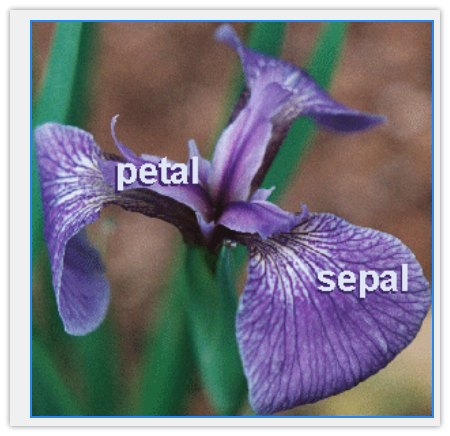

> 데이터의 4가지 정보가 sepal(꽃받침)의 크기정보와 petal(꽃잎)의 크기 정보로 구분되어 진다는 것을 알 수 있다.

In [8]:
iris_target_names = iris.target_names
print(type(iris_target_names))
iris_target_names

<class 'numpy.ndarray'>


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

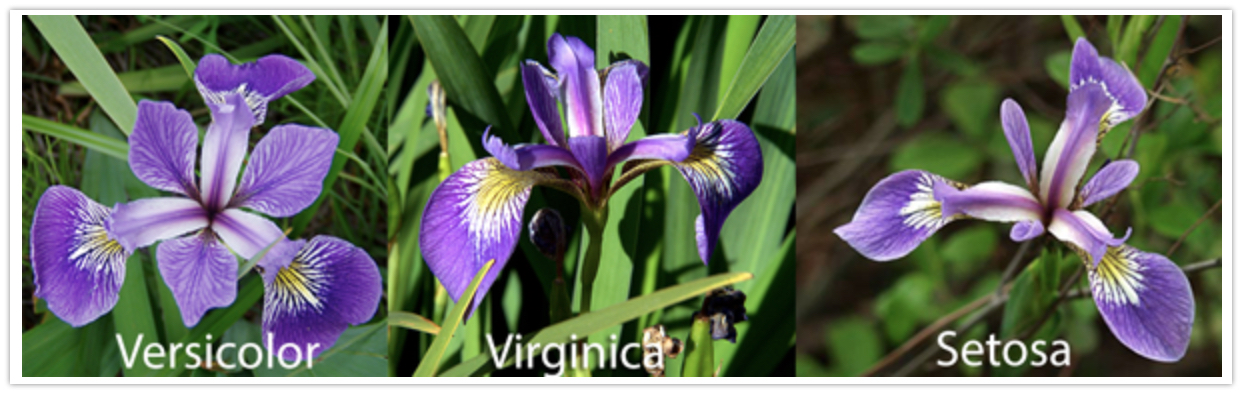

> target의 0, 1, 2 정보는 위의 꽃이름 정보이다.

In [ ]:
iris_DESCR = iris.DESCR
print(type(iris_DESCR))
print(iris_DESCR)

> str 형식으로 현재 datasets에 대한 간략한 정보들을 가지고 있다.

In [11]:
iris_filename = iris.filename
print(type(iris_filename))
print(iris_filename)

<class 'str'>
/usr/local/lib/python3.7/dist-packages/sklearn/datasets/data/iris.csv


> str 형식으로 현재 datasets의 위치 정보를 갖고 있다.

##2.3 dataframe 만들기

In [12]:
import pandas as pd

df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['label'] = iris.target

df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


##2.4 모델 만들기
> 모델을 만들기 위해 원본 데이터를 훈련데이터와 테스트데이터로 나뉘게 된다. 훈련데이터로 모델을 만들고 테스트 데이터로 모델의 성능을 확인하게 된다.

###2.4.1 datasets을 이용한 데이터 생성

In [ ]:
from sklearn.model_selection import train_test_split

train_test_split(iris.data, iris.target, test_size=0.2, random_state=62)

> train_test_split 함수의 인자는 다음과 같은 정보를 갖는다.
- 첫 번째 인자 : 분류할 feature 데이터 셋
- 두 번째 인자 : 결과 정보, label 데이터
- 세 번째 인자 : 테스트 데이터의 비율, 현재는 20%를 의미함
- 네 번째 인자 : 훈련 데이터와 테스트 데이터의 분리 시 값은 고정할 경우 사용

> random_state를 생략하면 매번 다른 값으로 훈련데이터와 테스트데이터가 나뉘기 때문에 학습이 어려워진다. 따라고 값을 고정하기 위해 62라는 숫자를 넣었으며 숫자는 원하는 값으로 변경하면 된다.

###2.4.2 DataFrame을 이용한 데이터 생성

In [14]:
df_iris.iloc[:3]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


> 위의 dataframe에서 data와 target으로 데이터를 나누어야 한다. data는 4번째 feature 정보까지 임으로 다음과 같이 나눌 수 있다.

In [15]:
df_iris.iloc[:3, :4]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


> 위와 같이 data 정보를 얻을 수 있다.

In [ ]:
df_iris['label']

> 위와 같이 label 정보를 얻을 수 있다. 이 두 가지를 이용하여 훈련데이터와 테스트 데이터를 얻을 수 있다.

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_iris.iloc[:, :4], df_iris['label'], test_size=0.2, random_state=62)
X_train[:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
53,5.5,2.3,4.0,1.3
70,5.9,3.2,4.8,1.8
101,5.8,2.7,5.1,1.9
120,6.9,3.2,5.7,2.3
14,5.8,4.0,1.2,0.2


> train_test_split 함수는 4개의 반환값을 갖게 되면 훈련용 x,y와 테스트용 x,y 정보를 반환한다. x는 여러개의 feature 정보를 갖게 됨으로 보통 대문자로 표현하며 y는 하나의 결과가 나타남으로 소문자를 사용한다. 

In [ ]:
df_iris.drop(['label'], axis=1)

> df_iris는 우리가 가공한 데이터로 기존 data 정보의 마자막 부분에 label정보를 추가한 것이다. 하지만 중간에 target 정보가 존재하게 되면 그 정보를 제외한 나머지 정보로 추출해야 하기 때문에 drop을 이용하여 제외된 정보를 얻을 수 있다.

##2.5 학습하기
> 분류 알고리즘의 하나인 의사결정트리를 이용하여 학습과 예측을 진행할 것이다.

###2.5.1 모델 생성

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 모델 얻어오기
dt_clf = DecisionTreeClassifier()
# 학습을 통한 모델 생성
dt_clf.fit(X_train, y_train)

> 의사결정트리(DecisionTreeClassifier)는 추후 학습할 것이며 여기서는 그냥 사용해 보자. fit함수는 과정에 속하는 X_train과 결과에 속하는 y_train을 넣어 주면 학습을 시켜 모델을 만들어 주게 된다.

###2.5.2 예측 및 비교

In [ ]:
X_test[:3]

In [ ]:
pred = dt_clf.predict(X_test)
pred

In [ ]:
y_test[:3]

> 테스트 데이터인 X_test에 따라 predict함수에 입력하면 예측 결과를 확인할 수 있다. 예측 결과와 y_test 정보를 확인해 보면 비슷한 결과를 얻은 것을 볼 수있다.

###2.5.3 예측 정확도

In [31]:
from sklearn.metrics import accuracy_score

print('예측 정확도 : ', accuracy_score(y_test, pred))

예측 정확도 :  0.9333333333333333


> 예측 결과 실제 데이터와 예측 데이터의 정확도가 약 93%로 나온것을 볼 수 있다.